In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [64]:
df = pd.read_csv('fraud.csv')

In [65]:
print(df.shape)

(555719, 23)


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  float64
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [67]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [68]:
obj_features = df.select_dtypes(np.object_).columns
obj_features

Index(['trans_date_trans_time', 'merchant', 'category', 'first', 'last',
       'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num'],
      dtype='object')

In [69]:
h_cardinality = [var for var in obj_features if df[var].nunique() > 100 and var != 'trans_date_trans_time']
h_cardinality

['merchant', 'first', 'last', 'street', 'city', 'job', 'dob', 'trans_num']

In [70]:
df.drop(h_cardinality, axis=1, inplace=True)
df.drop('Unnamed: 0', axis=1, inplace=True)

In [71]:
df.drop('cc_num', axis=1, inplace=True)

In [72]:
df.drop('trans_date_trans_time', axis=1, inplace=True)

In [73]:
df.drop('long', axis=1, inplace=True)
df.drop('lat', axis=1, inplace=True)
df.drop('zip', axis=1, inplace=True)

In [74]:
df.info()
df.category

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   category    555719 non-null  object 
 1   amt         555719 non-null  float64
 2   gender      555719 non-null  object 
 3   state       555719 non-null  object 
 4   city_pop    555719 non-null  int64  
 5   unix_time   555719 non-null  int64  
 6   merch_lat   555719 non-null  float64
 7   merch_long  555719 non-null  float64
 8   is_fraud    555719 non-null  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 38.2+ MB


0          personal_care
1          personal_care
2         health_fitness
3               misc_pos
4                 travel
               ...      
555714    health_fitness
555715         kids_pets
555716         kids_pets
555717            travel
555718     entertainment
Name: category, Length: 555719, dtype: object

In [75]:
df.head()

,category,amt,gender,state,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,personal_care,2.86,M,SC,333497,1371816865,33.986391,-81.200714,0
1,personal_care,29.84,F,UT,302,1371816873,39.450498,-109.960431,0
2,health_fitness,41.28,F,NY,34496,1371816893,40.495810,-74.196111,0
3,misc_pos,60.05,M,FL,54767,1371816915,28.812398,-80.883061,0
4,travel,3.19,M,MI,1126,1371816917,44.959148,-85.884734,0


In [76]:
y = df["is_fraud"]
print(f"Number fraud={np.count_nonzero(y)}, Number non-fraud={len(y)-np.sum(y)}")
print(f"Only {np.sum(y)/len(y)*100}% of samples are fraud")
X = df.drop("is_fraud", axis=1)

Number fraud=2145, Number non-fraud=553574
Only 0.3859864427885316% of samples are fraud


In [77]:
X.category = X.category.astype('category').cat.codes
X.gender = X.gender.astype('category').cat.codes
X.state= X.state.astype('category').cat.codes

In [78]:
X.head()

,category,amt,gender,state,city_pop,unix_time,merch_lat,merch_long
0,10,2.86,1,39,333497,1371816865,33.986391,-81.200714
1,10,29.84,0,43,302,1371816873,39.450498,-109.960431
2,5,41.28,0,33,34496,1371816893,40.495810,-74.196111
3,9,60.05,1,8,54767,1371816915,28.812398,-80.883061
4,13,3.19,1,21,1126,1371816917,44.959148,-85.884734


In [79]:
from imblearn.over_sampling import SMOTE

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.30, random_state=123)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.30, random_state=123)

In [80]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((272302, 8), (116701, 8), (272302,), (116701,))

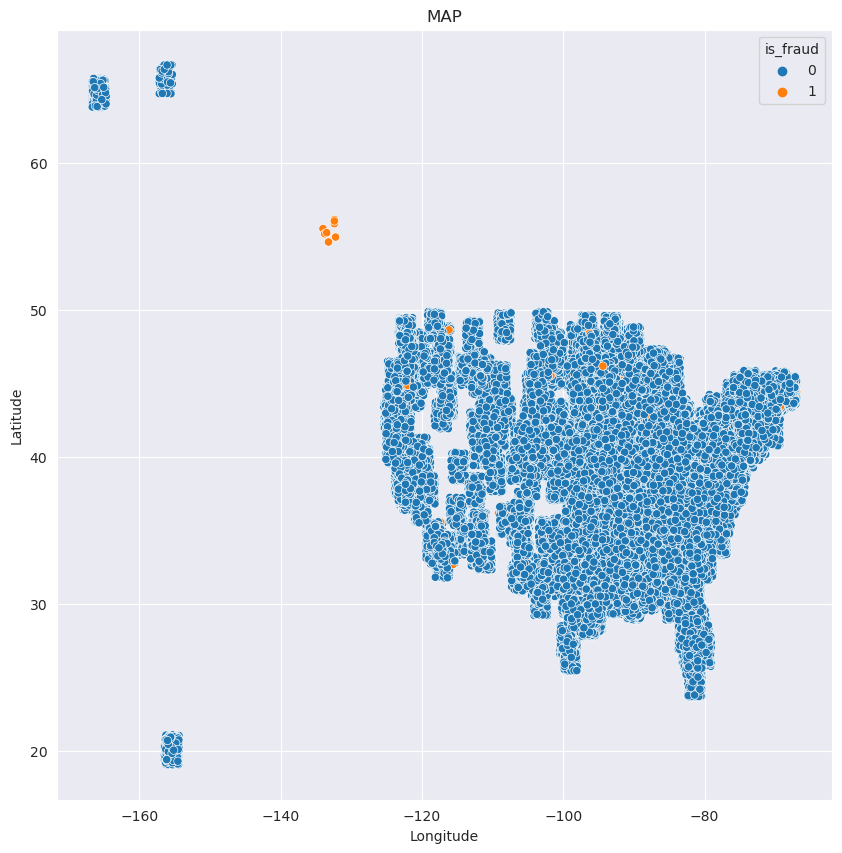

In [81]:
# Assuming 'high_cardinality' contains the names of the features
plt.figure(figsize=(10, 10))
m = sns.scatterplot(data = X_train, x = 'merch_long', y = 'merch_lat',hue = y_train)  #alpha controls the transparency of markers
plt.title('MAP')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
#plt.legend(title='Neighbourhood_group')
plt.show()

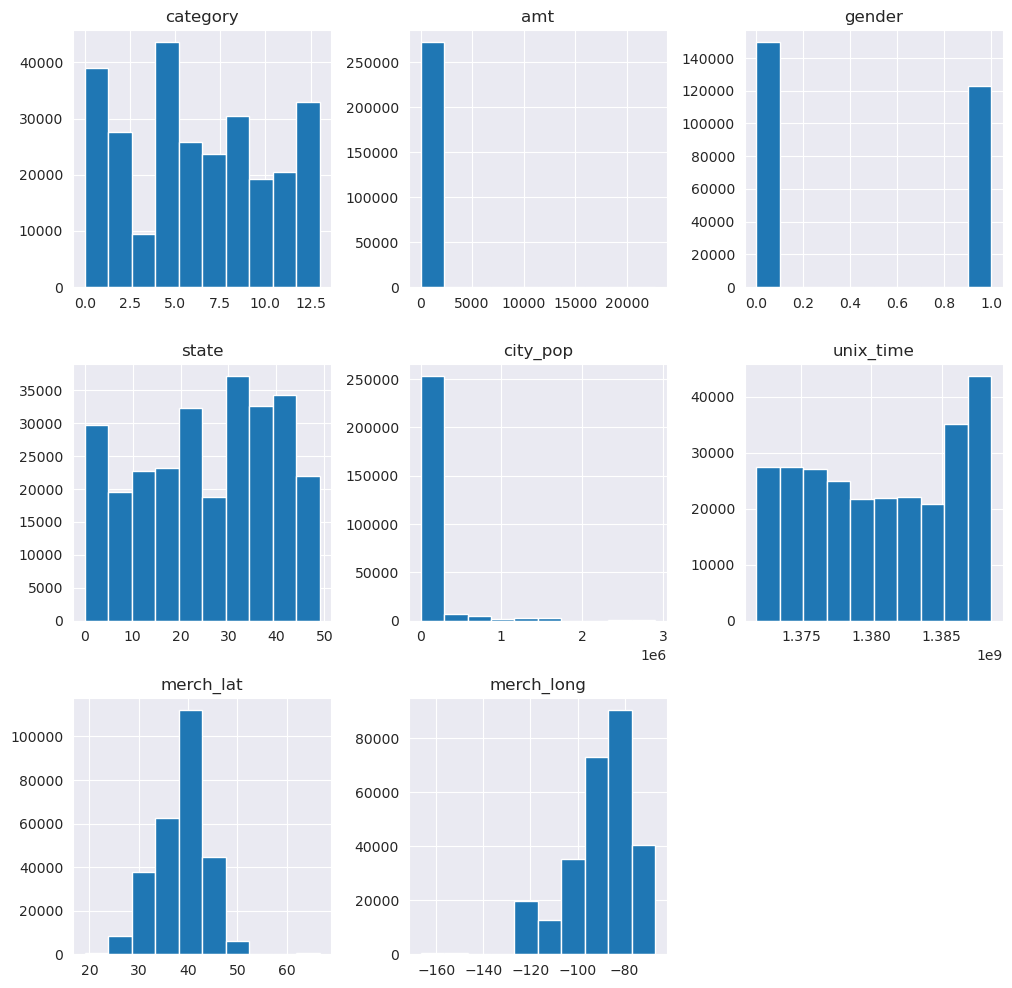

In [82]:
num_features = [feature for feature in X_train.columns]
X_train[num_features].hist(figsize = (12, 12));

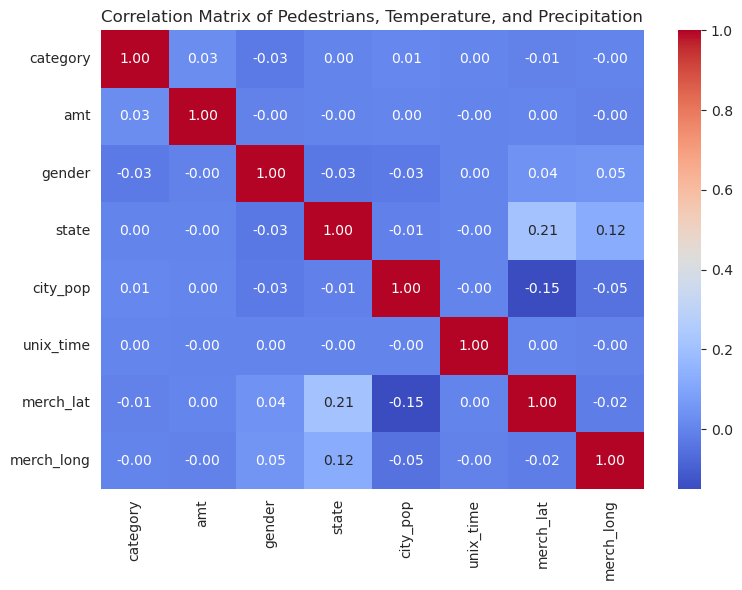

In [83]:
correlation_matrix = X_train[[i for i in num_features]].corr() 
plt.figure(figsize=(8, 6)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f") 
plt.title('Correlation Matrix of Pedestrians, Temperature, and Precipitation') 
plt.tight_layout() 
plt.show()

In [84]:
from sklearn.preprocessing import PolynomialFeatures

# smote = SMOTE(random_state=42)
scaler=StandardScaler()
scaler.fit(X)
X_train= scaler.transform(X_train)
X_test= scaler.transform(X_test)
X_val = scaler.transform(X_val)

sampler = SMOTE(random_state=42)
X_train, y_train = sampler.fit_resample(X_train, y_train)

# poly = PolynomialFeatures(2)
# X_train = poly.fit_transform(X_train)
# X_val = poly.fit_transform(X_val)
# print(X_train.shape)



In [85]:
from tensorflow.keras import regularizers
import tensorflow as tf
from tensorflow.keras import layers, models
'''
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
'''
model = models.Sequential([
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.5), input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.5)),
    layers.Dense(1, activation='sigmoid')
])


/home/cybercricetus/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [86]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [87]:
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
16955/16955 ━━━━━━━━━━━━━━━━━━━━ 21s 1ms/step - accuracy: 0.8329 - loss: 1.3287
Epoch 2/10
16955/16955 ━━━━━━━━━━━━━━━━━━━━ 21s 1ms/step - accuracy: 0.8479 - loss: 0.4788
Epoch 3/10
16955/16955 ━━━━━━━━━━━━━━━━━━━━ 21s 1ms/step - accuracy: 0.8466 - loss: 0.4634
Epoch 4/10
16955/16955 ━━━━━━━━━━━━━━━━━━━━ 21s 1ms/step - accuracy: 0.8441 - loss: 0.4561
Epoch 5/10
16955/16955 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - accuracy: 0.8452 - loss: 0.4498
Epoch 6/10
16955/16955 ━━━━━━━━━━━━━━━━━━━━ 21s 1ms/step - accuracy: 0.8462 - loss: 0.4452
Epoch 7/10
16955/16955 ━━━━━━━━━━━━━━━━━━━━ 22s 1ms/step - accuracy: 0.8451 - loss: 0.4429
Epoch 8/10
16955/16955 ━━━━━━━━━━━━━━━━━━━━ 22s 1ms/step - accuracy: 0.8442 - loss: 0.4415
Epoch 9/10
16955/16955 ━━━━━━━━━━━━━━━━━━━━ 24s 1ms/step - accuracy: 0.8424 - loss: 0.4415
Epoch 10/10
16955/16955 ━━━━━━━━━━━━━━━━━━━━ 24s 1ms/step - accuracy: 0.8434 - loss: 0.4388


In [88]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

y_train_pred = model.predict(X_train)
y_train_pred_classes = (y_train_pred > 0.5).astype("int32")
train_loss, train_acc = model.evaluate(X_train, y_train)
train_precision = precision_score(y_train, y_train_pred_classes)
train_recall = recall_score(y_train, y_train_pred_classes)
print("Train Accuracy: ", train_acc)
print("Train Precision:", train_precision)
print("Train Recall:", train_recall)
print("Train loss: ", train_loss)

16955/16955 ━━━━━━━━━━━━━━━━━━━━ 15s 862us/step
16955/16955 ━━━━━━━━━━━━━━━━━━━━ 16s 946us/step - accuracy: 0.8896 - loss: 0.4358
Train Accuracy:  0.837455153465271
Train Precision: 0.8982602529354697
Train Recall: 0.7611167838277199
Train loss:  0.43688082695007324


In [89]:
y_val_pred = model.predict(X_val)
y_val_pred_classes = (y_val_pred > 0.5).astype("int32")
val_loss, val_acc = model.evaluate(X_val, y_val)
val_precision = precision_score(y_val, y_val_pred_classes)
val_recall = recall_score(y_val, y_val_pred_classes)
print("Validation Accuracy: ", val_acc)
print("Validation Precision:", val_precision)
print("Validation Recall:", val_recall)
print("Validation loss: ", val_loss)

3647/3647 ━━━━━━━━━━━━━━━━━━━━ 3s 878us/step
3647/3647 ━━━━━━━━━━━━━━━━━━━━ 4s 993us/step - accuracy: 0.9142 - loss: 0.4338
Validation Accuracy:  0.9138996005058289
Validation Precision: 0.03463665470068885
Validation Recall: 0.7846153846153846
Validation loss:  0.4319397211074829


In [90]:
for layer in model.layers:
    weights = layer.get_weights()
    if weights:
        print("Layer:", layer.name)
        print("Weights shape:", weights[0].shape)
        print("Biases shape:", weights[1].shape)
        print("Weights:", weights[0])
        print("Biases:", weights[1])
        print()

Layer: dense_6
Weights shape: (8, 64)
Biases shape: (64,)
Weights: [[-3.45503432e-36  6.11143990e-36 -3.16324830e-02 -7.51925797e-36
   6.62151362e-36 -2.12612088e-36  1.11255052e-35  1.79651288e-36
   4.83549330e-36 -2.93060987e-36  7.32589976e-36 -8.51001015e-36
  -1.25710239e-36  6.54373900e-36 -4.38116086e-36  7.00064714e-36
  -8.17473884e-36  1.15634062e-35  3.53804285e-36  5.33941763e-36
  -9.71053039e-36 -3.55127003e-36  7.56407512e-36 -1.02884763e-35
  -3.35238017e-36 -2.64914555e-36  7.10048021e-36  1.04742329e-35
   1.36692401e-36 -7.44495014e-36  4.70901502e-36 -8.45415049e-36
  -5.37416803e-36 -5.62839667e-37  6.68492100e-37  1.06118671e-35
  -1.02331418e-35 -8.67203953e-36  3.54351638e-36 -8.76067872e-36
  -4.37046489e-36  2.81086715e-36 -5.80319262e-36  4.25970339e-37
  -3.05069698e-36  3.72834178e-37  1.05175456e-35 -1.00594838e-35
   8.56505907e-38  3.06565648e-36 -6.99178645e-36 -2.69226662e-36
   1.07678167e-35 -7.65521683e-37  5.67377417e-36  1.17986838e-36
   8.4407

In [91]:
print(1-sum(y_train)/len(y_train))

0.5


In [92]:
print(1-sum(y_val)/len(y_val))

0.9961011473766291


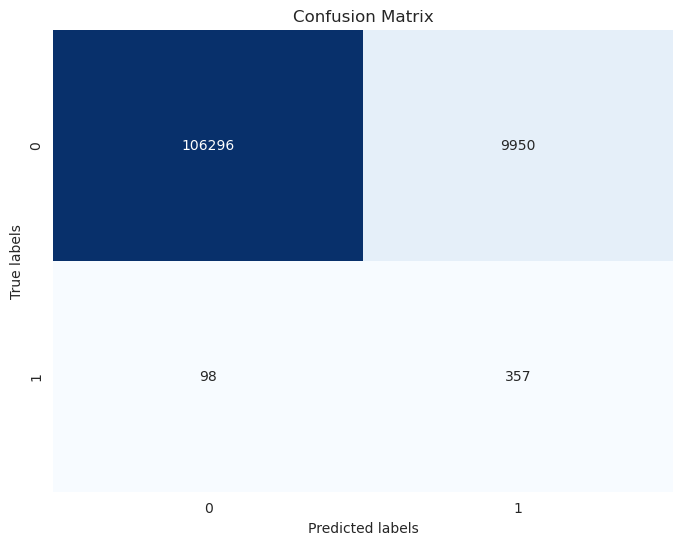

[[106296   9950]
 [    98    357]]


In [93]:


from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_val, y_val_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
print(conf_matrix)